In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Hall Effect
- *Author: Chen Huang*
- *Date: 16 Feb 2024*

## Classical Hall Effect

In [2]:
def lorentz_motion(initial_conditions, t, B, E, e=1.0, m=1.0):
    """
    Function to solve the Lorentz force equations of motion for a charged particle
    in a electromagnetic field.

    Parameters:
    initial_conditions (tuple): The initial conditions (vx0, vy0, x0, y0).
    t (array): The time steps at which to solve the equations of motion.
    B (float): The magnetic field strength along z direction.
    E (float): The electric field strength along y direction.
    e (float): The charge of the particle.
    m (float): The mass of the particle.

    Returns:
    vx (array): x components of the velocity at each time step.
    vy (array): y components of the velocity at each time step.
    x (array): x components of the position at each time step.
    y (array): y components of the position at each time step.
    """
    n = len(t) # Number of time steps

    # Arrays to store the solutions
    vx = np.zeros(n)
    vy = np.zeros(n)
    x = np.zeros(n)
    y = np.zeros(n)

    # Initial conditions
    vx[0], vy[0], x[0], y[0] = initial_conditions

    for i in range(1, len(t)):
        # Lorentz force equations
        dvx = -e * B * vy[i-1] / m
        dvy = e * B * vx[i-1] / m - e * E / m
        dt = t[i] - t[i-1]

        # Update the velocity
        vx[i] = vx[i-1] + dvx * dt
        vy[i] = vy[i-1] + dvy * dt

        # Update the position
        x[i] = x[i-1] + vx[i] * dt
        y[i] = y[i-1] + vy[i] * dt

    return vx, vy, x, y

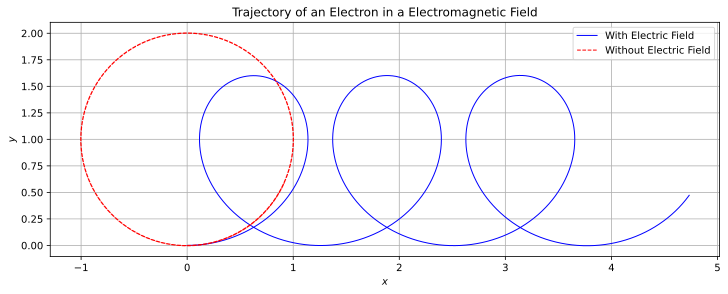

In [3]:
# Constants
m = 1.0  # mass
e = 1.0  # charge
B = 1.0  # magnetic field strength
E = 0.2  # electric field strength

# Time span
time = np.linspace(0, 20, 50000) 

# Solve the system 
vz, vy, x, y = lorentz_motion([1.0, 0, 0, 0], time, B, E, e, m)
vz1, vy1, x1, y1 = lorentz_motion([1.0, 0, 0, 0], time, B, 0, e, m) # Without electric field


# Plot the trajectory
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, y, 'b', linewidth=1, label='With Electric Field')
ax.plot(x1, y1, '--r', linewidth=1, label='Without Electric Field')
ax.set_aspect('equal')  
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Trajectory of an Electron in a Electromagnetic Field')
plt.legend()
plt.grid(True)
plt.show()


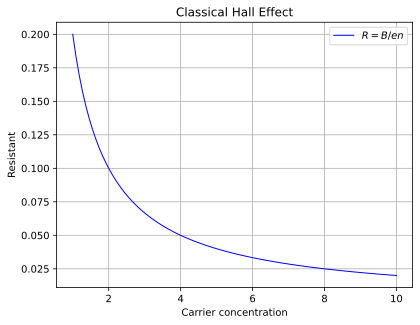

In [4]:
# Calculate the drift velocity
for i in range(1, len(y)-1):
    if y[i] < y[i+1] and y[i]>y[i-1] and y[i]<1e-6:
        drift_velocity = x[i]/time[i]
        break

# Plot the resistant as a function of carrier concentration
n = np.linspace(1, 10, 100) # Carrier concentration
current_density = n * e * drift_velocity
resistant = E / current_density
plt.plot(n, resistant, 'b', linewidth=1, label='$R=B/en$')
plt.xlabel('Carrier concentration')
plt.ylabel('Resistant')
plt.title('Classical Hall Effect')
plt.grid(True)
plt.legend()
plt.show()